In [24]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

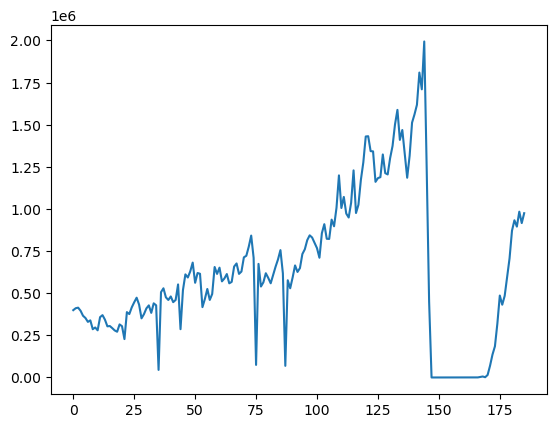

In [25]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 3 (90-5-5).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [27]:
train_size = 168
validation_size = 9
test_size = 9

In [28]:
train = df1[0:168, :]
train.shape

(168, 1)

In [29]:
validation = df1[169:177, :]
validation.shape

(8, 1)

In [30]:
test = df1[177:186, :]
test.shape

(9, 1)

In [31]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [33]:
x_test, y_test = get_data(test, look_back)

In [34]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [35]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(12, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

Epoch 1/50
166/166 [==============================] - 15s 6ms/step - loss: 0.0224
Epoch 2/50
166/166 [==============================] - 1s 6ms/step - loss: 0.0079
Epoch 3/50
166/166 [==============================] - 1s 6ms/step - loss: 0.0073
Epoch 4/50
166/166 [==============================] - 1s 5ms/step - loss: 0.0074
Epoch 5/50
166/166 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 6/50
166/166 [==============================] - 1s 7ms/step - loss: 0.0073
Epoch 7/50
166/166 [==============================] - 1s 8ms/step - loss: 0.0071
Epoch 8/50
166/166 [==============================] - 2s 9ms/step - loss: 0.0076
Epoch 9/50
166/166 [==============================] - 1s 8ms/step - loss: 0.0075
Epoch 10/50
166/166 [==============================] - 2s 10ms/step - loss: 0.0069
Epoch 11/50
166/166 [==============================] - 1s 9ms/step - loss: 0.0070
Epoch 12/50
166/166 [==============================] - 2s 10ms/step - loss: 0.0080
Epoch 13/50
166/166 [=

In [36]:
y_pred = model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [37]:
scaler.scale_

array([5.01473077e-07])

In [38]:
y_pred = scaler.inverse_transform(y_pred)

In [39]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [40]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [41]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 80366.08329407459


In [42]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 73566.85714285714


In [43]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 0.08996170157826375


In [44]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 9.190555436783418


In [45]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 9.807375083591703


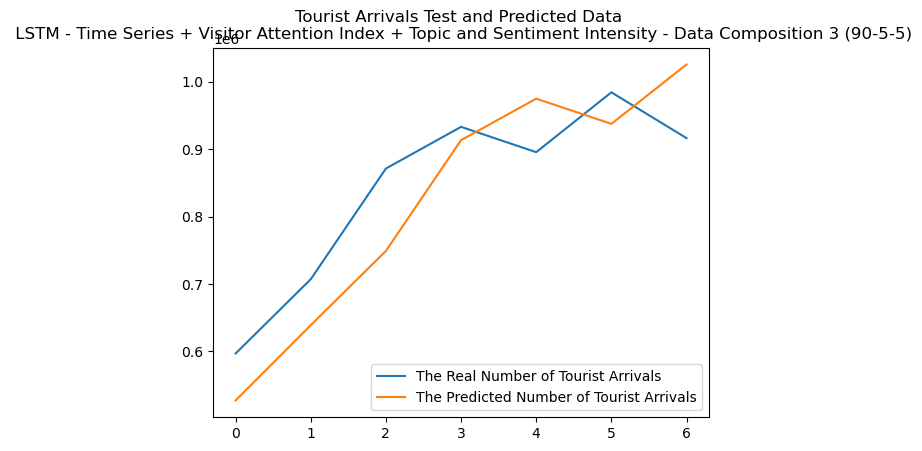

In [46]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series + Visitor Attention Index + Topic and Sentiment Intensity - Data Composition 3 (90-5-5)")
plt.legend()
plt.show()